### Extração de Texto de Imagens - OCR
https://www.kaggle.com/datasets/neuronlab/texto-ocr/data

#### O Objetivo da análise desse dataset, é utilizar a tecnologia tesseract que faz a leitura da imagem através do OCR, para extrair da imagem apenas o texto.
#### Serão realizados os seguintes pontos:
    - Upload de 2 imagens;
    - Tranformação das imagens para RGB;
    - Extração de texto das imagens;
    - Gravando os textos em arquivos csv;
    - Fazer a contagem da quantidade de palavras existentes nos 2 textos;
    - Medir a distância entre um texto e o outro com a medida de "LEVENSHTEIN";
    - Ao final será feito o comparativo se um texto é iglau ao outro. 

In [8]:
pip install pytesseract opencv-python-headless

Note: you may need to restart the kernel to use updated packages.


In [54]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


### Importando as Bibliotecas

In [52]:
import pytesseract
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Configurando o caminho para o executável do Tesseract

In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Carregando a imagem usando o Pillow (PIL)

In [11]:
imagem = cv2.imread(r'C:\Users\gisle\Documentos\GitHub\OCR\ExtracaoTextoImagensOCR\trecho_poesia_silencio.png')

In [12]:
imagem2 = cv2.imread(r'C:\Users\gisle\Documentos\GitHub\OCR\ExtracaoTextoImagensOCR\trecho_poesia_repousa.png')

In [13]:
print(cv2.__version__)

4.8.1


In [14]:
print(imagem)
print(imagem2)

[[[238 238 238]
  [237 237 237]
  [237 237 237]
  ...
  [247 247 247]
  [244 244 244]
  [239 239 239]]

 [[238 238 238]
  [236 236 236]
  [235 235 235]
  ...
  [246 246 246]
  [246 246 246]
  [243 243 243]]

 [[240 240 240]
  [238 238 238]
  [235 235 235]
  ...
  [242 242 242]
  [245 245 245]
  [245 245 245]]

 ...

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ...
  [240 240 240]
  [240 240 240]
  [239 239 239]]

 [[238 238 238]
  [239 239 239]
  [240 240 240]
  ...
  [242 242 242]
  [240 240 240]
  [237 237 237]]

 [[234 234 234]
  [235 235 235]
  [236 236 236]
  ...
  [244 244 244]
  [241 241 241]
  [237 237 237]]]
[[[238 238 238]
  [237 237 237]
  [237 237 237]
  ...
  [247 247 247]
  [244 244 244]
  [239 239 239]]

 [[238 238 238]
  [236 236 236]
  [235 235 235]
  ...
  [246 246 246]
  [246 246 246]
  [243 243 243]]

 [[240 240 240]
  [238 238 238]
  [235 235 235]
  ...
  [242 242 242]
  [245 245 245]
  [245 245 245]]

 ...

 [[241 241 241]
  [241 241 241]
  [241 241 241]
  ..

### Convertendo a imagem de BGR para RGB (matplotlib usa RGB)


In [15]:
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_rgb2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2RGB)

### Exibindo a imagem usando o matplotlib

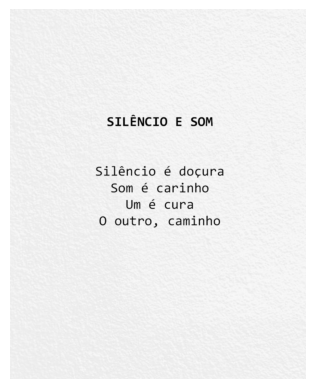

In [16]:
plt.imshow(imagem_rgb)
plt.axis('off')  # Desligue os eixos
plt.show()

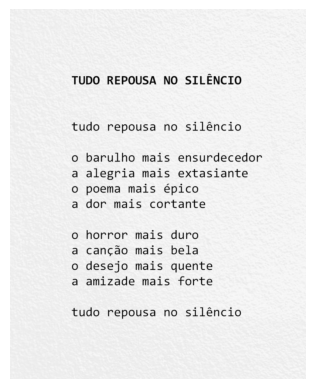

In [17]:
plt.imshow(imagem_rgb2)
plt.axis('off')  # Desligue os eixos
plt.show()

# Fazendo o OCR na imagem

In [18]:
imagem_cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
print (imagem_cinza)

[[238 237 237 ... 247 244 239]
 [238 236 235 ... 246 246 243]
 [240 238 235 ... 242 245 245]
 ...
 [241 241 241 ... 240 240 239]
 [238 239 240 ... 242 240 237]
 [234 235 236 ... 244 241 237]]


In [19]:
imagem_cinza2 = cv2.cvtColor(imagem2, cv2.COLOR_BGR2GRAY)
print (imagem_cinza2)

[[238 237 237 ... 247 244 239]
 [238 236 235 ... 246 246 243]
 [240 238 235 ... 242 245 245]
 ...
 [241 241 241 ... 240 240 239]
 [238 239 240 ... 242 240 237]
 [234 235 236 ... 244 241 237]]


In [20]:
imagem_rgb_cinza = cv2.cvtColor(imagem_cinza, cv2.COLOR_BGR2RGB)

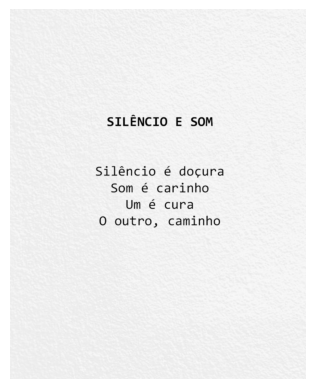

In [21]:
plt.imshow(imagem_rgb_cinza)
plt.axis('off')  # Desligue os eixos
plt.show()

In [22]:
imagem_rgb_cinza2 = cv2.cvtColor(imagem_cinza2, cv2.COLOR_BGR2RGB)

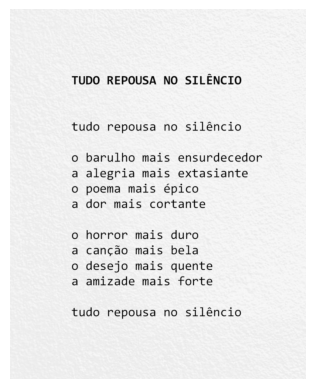

In [23]:
plt.imshow(imagem_rgb_cinza2)
plt.axis('off')  # Desligue os eixos
plt.show()

# Tranformando imagem em texto

In [24]:
texto = pytesseract.image_to_string(imagem)

In [25]:
texto2 = pytesseract.image_to_string(imagem2)

# Imprimindo o Texto identificado na imagem

In [26]:
print(texto)
print(texto2)

SILENCIO E SOM

Siléncio é docura
Som é carinho
Um 6 cura
O outro, caminho

TUDO REPOUSA NO SILENCIO

tudo repousa no siléncio

barulho mais ensurdecedor
alegria mais extasiante
poema mais épico

dor mais cortante

9owvo

horror mais duro
cancao mais bela
desejo mais quente
amizade mais forte

ooo

tudo repousa no siléncio



In [27]:
texto_extraido = pytesseract.image_to_string(imagem_cinza)

In [28]:
texto_extraido2 = pytesseract.image_to_string(imagem_cinza2)

### Salvar o texto em um arquivo de texto

In [29]:
with open('texto_extraido.txt', 'w', encoding='utf-8') as arquivo:
    arquivo.write(texto_extraido)
    
with open('texto_extraido2.txt', 'w', encoding='utf-8') as arquivo:
    arquivo.write(texto_extraido2)

### Ler o texto do arquivo

In [30]:
with open('texto_extraido.txt', 'r', encoding='utf-8') as arquivo:
    texto = arquivo.read()
    
with open('texto_extraido2.txt', 'r', encoding='utf-8') as arquivo:
    texto2 = arquivo.read()

## Dividir o texto em palavras

In [31]:
palavras = texto.split()

In [32]:
palavras2 = texto2.split()

### Contar o número de palavras

In [33]:
numero_de_palavras = len(palavras) 
numero_de_palavras2 = len(palavras2) 


print("Número de palavras no texto:", numero_de_palavras)
print("Número de palavras no texto2:", numero_de_palavras2)



Número de palavras no texto: 15
Número de palavras no texto2: 38


### Levenshtein é conhecida como a distância de edição, que é utilizada para medir a similaridade entre as strings de um texto para o outro.

#### Sendo assim, será preciso instalar o pacote com o comando  a seguir

In [34]:
pip install python-Levenshtein

Note: you may need to restart the kernel to use updated packages.


#### Importar o pacote Levenshtein

In [35]:
import Levenshtein

### Calcular a distância de Levenshtein entre os dois textos

In [36]:
distancia = Levenshtein.distance(texto_extraido, texto_extraido2)
print("Distância de Levenshtein entre os textos:", distancia)

Distância de Levenshtein entre os textos: 199


### Comparativo entre um texto e outro

In [37]:
limite = 10  # Definindo um limite
if distancia <= limite:
    print("Os textos são semelhantes.")
else:
    print("Os textos são diferentes.")

Os textos são diferentes.


### FIM